In [1]:
#import library yang dibutuhkan

import pandas as pd
import numpy as np
import nltk 
import string
import re

In [2]:
def load_data():
    data = pd.read_csv('sentimenta.csv')
    return data

In [3]:
sentimen_df = load_data()

In [4]:
sentimen_df.head()

,Timestamp,Nama,Tanggal Lahir,Domisili,Pantai Losari,Status Pantai Losari,Benteng Fort Rotterdam,Status Benteng Fort Rotterdam,Pantai Akkarena,Status Pantai Akkarena,Pantai Tanjung Bayang,Status Pantai Tanjung Bayang,Pulau Samalona,Status Pulau Samalona
0,2020/12/19 1:30:58 PM GMT+8,Gustham,2000-08-09,Makassar,"Ya, saya pernah mengunjungi objek wisata Panta...",Positif,"Ya, saya pernah mengunjungi objek wisata Bente...",Positif,"Belum, saya belum pernah mengunjungi objek wis...",Positif,"Ya, saya pernah mengunjungi objek wisata Panta...",Positif,"Belum, saya belum pernah mengunjungi objek wis...",Positif
1,2020/12/19 1:43:56 PM GMT+8,Fx chaniago,2001-06-07,MAKASSAR,"Pernah, pantai losari sangat bagus buat di jad...",Positif,"Pernah, fort rotterdam sangat bagus buat di ja...",Positif,"Pernah, pantai akkarena sangat bagus buat di j...",Positif,Pantai tanjung bayang juga sangat asyik buat d...,Positif,Pulau samona merupakan tempat yang menarik bua...,Positif
2,2020/12/19 1:47:50 PM GMT+8,Nadya,2000-05-28,Makassar,Berbagai patung pahlawan dan juga sebuah rumah...,Positif,Terdapat banyak peninggalan peninggalan kuno y...,Positif,Menjadi tempat objek wisata yang menarik untuk...,Positif,Menjadi pantai yang paling sering di kunjungi ...,Positif,Sarana dan prasaran yang ada cukup memadai na...,Positif
3,2020/12/19 1:54:04 PM GMT+8,Leonardo Yose,1999-10-12,Makassar,Ya. Saya pernah. Sarana dan prasarana di panta...,Positif,Ya. Saya pernah. Sarana dan prasarana Benteng ...,Negatif,Saya belum pernah. Tapi yang saya tahu tentang...,Positif,Ya. Saya pernah. Sarana dan prasarana di Tanju...,Negatif,Saya belum pernah. Sarana dan prasarana wisata...,Positif
4,2020/12/19 2:05:23 PM GMT+8,Jerome Al-Kadeer,2002-01-13,Permata Hijau Permai,"Pernah, tempatnya bagus tapi kurang terawat da...",Negatif,"Belum, katanya isinya barang peninggalan zaman...",Positif,"Pernah, untuk pemandangan pantai ini sebenarny...",Positif,"Belum, katanya disana banyak ubur ubur jadi ha...",Positif,"Pernah, pulau ditengah laut dengan pasir putih...",Positif


In [5]:
x = sentimen_df.iloc [:, [6, 7]]
x

,Benteng Fort Rotterdam,Status Benteng Fort Rotterdam
0,"Ya, saya pernah mengunjungi objek wisata Bente...",Positif
1,"Pernah, fort rotterdam sangat bagus buat di ja...",Positif
2,Terdapat banyak peninggalan peninggalan kuno y...,Positif
3,Ya. Saya pernah. Sarana dan prasarana Benteng ...,Negatif
4,"Belum, katanya isinya barang peninggalan zaman...",Positif
...,...,...
108,"Bagus, wisatawan luar juga mudah untuk mengena...",Positif
109,Pernah. perlu ditingkatkan dari segi pelayanan...,Positif
110,"salah satu ikonnya kota Makkasar. Menurutku, p...",Positif
111,"Belum pernah, saya melihat benteng sebagai hal...",Positif


In [6]:
sentimen_all = {'komentar':[], 'status':[]}
for index, row in sentimen_df.iterrows():
    sentimen_all['komentar'].append(row['Pantai Losari']) 
    sentimen_all['status'].append(row['Status Pantai Losari'])
    
    sentimen_all['komentar'].append(row['Benteng Fort Rotterdam']) 
    sentimen_all['status'].append(row['Status Benteng Fort Rotterdam'])
    
    sentimen_all['komentar'].append(row['Pantai Akkarena']) 
    sentimen_all['status'].append(row['Status Pantai Akkarena'])
    
    sentimen_all['komentar'].append(row['Pantai Tanjung Bayang']) 
    sentimen_all['status'].append(row['Status Pantai Tanjung Bayang'])
    
    sentimen_all['komentar'].append(row['Pulau Samalona']) 
    sentimen_all['status'].append(row['Status Pulau Samalona'])

sentimen_all_df = pd.DataFrame(sentimen_all)
sentimen_all_df

,komentar,status
0,"Ya, saya pernah mengunjungi objek wisata Panta...",Positif
1,"Ya, saya pernah mengunjungi objek wisata Bente...",Positif
2,"Belum, saya belum pernah mengunjungi objek wis...",Positif
3,"Ya, saya pernah mengunjungi objek wisata Panta...",Positif
4,"Belum, saya belum pernah mengunjungi objek wis...",Positif
...,...,...
560,Pernah. Losari adalah tempat yg nyaman untuk b...,Negatif
561,Pernah. Tempatnya bersih dan terawat. Sangat b...,Positif
562,Belum pernah. Dan belum tau apa-apa tentang pa...,Positif
563,Belum pernah. Dan belum tau apa-apa tentang pa...,Positif


In [7]:
label = []
for index, row in sentimen_all_df.iterrows():
    if row["status"] == 'Positif':
        label.append(1)
    else:
        label.append(0)

In [8]:
sentimen_all_df["status"].value_counts()

Positif    429
Negatif    136
Name: status, dtype: int64

In [9]:
label = []
for index, row in sentimen_all_df.iterrows():
    if row["status"] == "Positif":
        label.append(1)
    else:
        label.append(0)
        
sentimen_all_df["label"] = label
sentimen_all_df = sentimen_all_df.drop(columns=["status"])
sentimen_all_df

,komentar,label
0,"Ya, saya pernah mengunjungi objek wisata Panta...",1
1,"Ya, saya pernah mengunjungi objek wisata Bente...",1
2,"Belum, saya belum pernah mengunjungi objek wis...",1
3,"Ya, saya pernah mengunjungi objek wisata Panta...",1
4,"Belum, saya belum pernah mengunjungi objek wis...",1
...,...,...
560,Pernah. Losari adalah tempat yg nyaman untuk b...,0
561,Pernah. Tempatnya bersih dan terawat. Sangat b...,1
562,Belum pernah. Dan belum tau apa-apa tentang pa...,1
563,Belum pernah. Dan belum tau apa-apa tentang pa...,1


In [10]:
sentimen_all_df['label'].value_counts()

1    429
0    136
Name: label, dtype: int64

In [11]:
s_1 = sentimen_all_df[sentimen_all_df['label']==0].sample(136, replace=True)
s_2 = sentimen_all_df[sentimen_all_df['label']==1].sample(136, replace=True)
sentimen_all_df = pd.concat([s_1, s_2])

print(sentimen_all_df.shape)
print(sentimen_all_df['label'].value_counts(normalize=True))

(272, 2)
0    0.5
1    0.5
Name: label, dtype: float64


In [12]:
import string, re

def cleansing(data):
    #lower text
    data = data.lower()
    
    #hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    #remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    
    #remove newline
    data = data.replace('\n', ' ')
    
    return data
    

In [13]:
review = []
for index, row in sentimen_all_df.iterrows():
    review.append(cleansing(row["komentar"]))
    
sentimen_all_df["komentar"] = review
sentimen_all_df.head()

,komentar,label
120,bgs tapi busuk byk pencopet pantai tp nd kek...,0
264,pernah menurut sy pulau samalona merupakan te...,0
20,pernah tempatnya bagus tapi kurang terawat da...,0
333,belum memadai seperti wc tempat tinggal dan ...,0
408,pernah sarana dan prasarana belum memadai dim...,0


In [14]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [15]:
review = []
for index, row in sentimen_all_df.iterrows():
    review.append(stopword.remove(row["komentar"]))
    
sentimen_all_df["komentar"] = review
sentimen_all_df.head()

,komentar,label
120,bgs busuk byk pencopet pantai tp nd kek pant...,0
264,pernah sy pulau samalona merupakan tempat wis...,0
20,pernah tempatnya bagus kurang terawat banyak ...,0
333,memadai wc tempat tinggal juga masi banyak s...,0
408,pernah sarana prasarana memadai toiletnya mas...,0


In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [17]:
review = []
for index, row in sentimen_all_df.iterrows():
    review.append(stemmer.stem(row["komentar"]))
    
sentimen_all_df["komentar"] = review
sentimen_all_df.head()

,komentar,label
120,bgs busuk byk copet pantai tp nd kek pantai,0
264,pernah sy pulau samalona rupa tempat wisata lu...,0
20,pernah tempat bagus kurang awat banyak sampah ...,0
333,pada wc tempat tinggal juga mas banyak sampah2...,0
408,pernah sarana prasarana pada toilet masih kura...,0


In [18]:
sentimen_all_df.iloc[0,0]

'bgs busuk byk copet pantai tp nd kek pantai'

In [19]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [20]:
# Tambahkan Stopword Baru
#data = stop_factory.get_stop_words()+more_stopword

In [21]:
review = []
for index, row in sentimen_all_df.iterrows():
    review.append(stopword.remove(row["komentar"]))
    
sentimen_all_df["komentar"] = review
sentimen_all_df.head()

,komentar,label
120,bgs busuk byk copet pantai tp nd kek pantai,0
264,pernah sy pulau samalona rupa tempat wisata lu...,0
20,pernah tempat bagus kurang awat banyak sampah ...,0
333,wc tempat tinggal mas banyak sampah2 keliling ...,0
408,pernah sarana prasarana toilet kurang nyaman,0


In [22]:
sentimen_all_df.iloc[0,0]

'bgs busuk byk copet pantai tp nd kek pantai'

In [236]:
#STARTS FROM HERE DUDE
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentimen_all_df["komentar"], 
                                                    sentimen_all_df["label"], 
                                                    test_size=0.25, stratify=sentimen_all_df["label"], random_state=30)

In [238]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(204, 499)
(68, 499)


In [239]:
def preprocess_data(data):
    #cleansing data
    data = cleansing(data)
    
    #hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    #stemming
    fatory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    #count vectorizer
    data = vectorizer.transform([data])
    
    return data



In [240]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [241]:
predict = neigh.predict(X_test)

In [242]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [243]:
#f1 score
print("F1 score hasil prediksi adalah: ")
print(f1_score(y_test, predict))

#accuracy score
print("Accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, predict))

#precision score
print("Precision score hasil prediksi adalah: ")
print(precision_score(y_test, predict))

#recall score
print("Recall score hasil prediksi adalah: ")
print(precision_score(y_test, predict))

F1 score hasil prediksi adalah: 
0.7719298245614036
Accuracy score hasil prediksi adalah: 
0.8088235294117647
Precision score hasil prediksi adalah: 
0.9565217391304348
Recall score hasil prediksi adalah: 
0.9565217391304348


In [244]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn, fp, fn, tp

(33, 1, 12, 22)

C:\Users\Babayaga\miniconda3\envs\sentimen\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


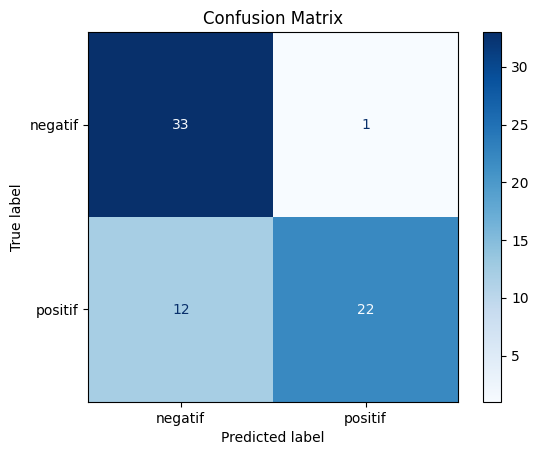

In [245]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(neigh, X_test, y_test,
                             display_labels=["negatif","positif"],
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

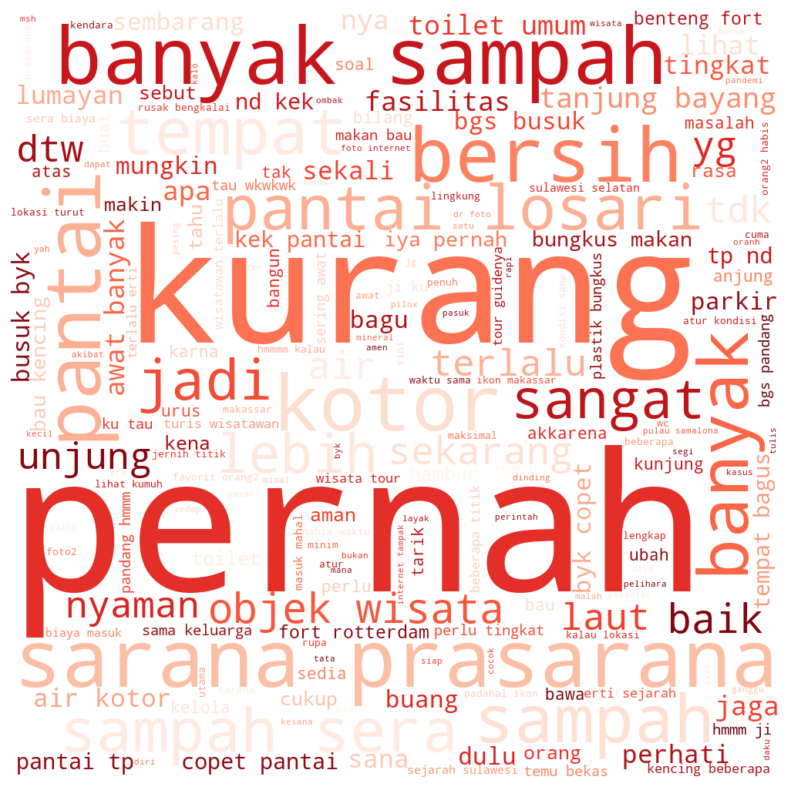

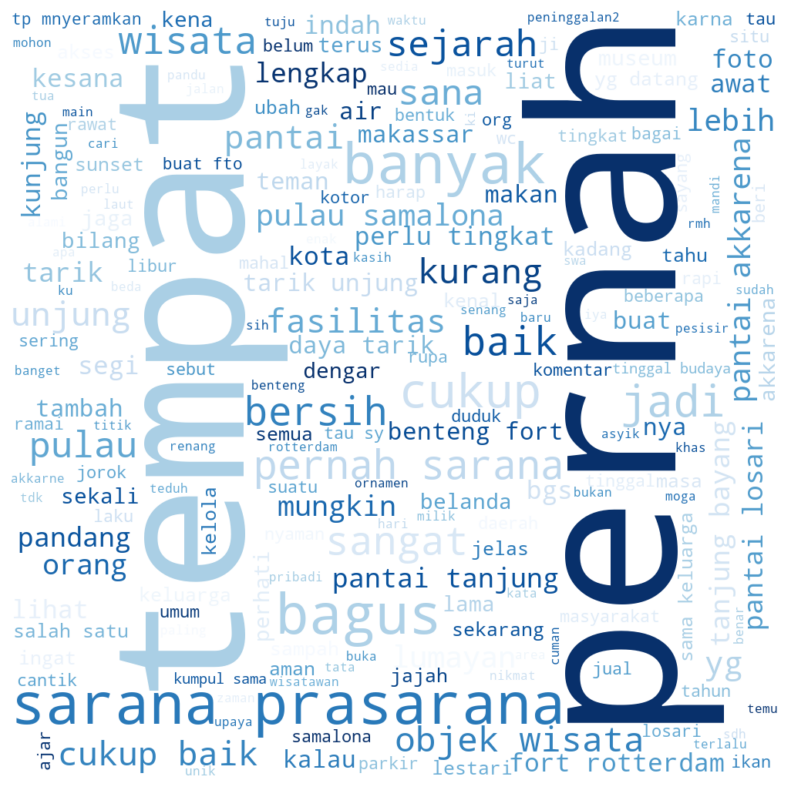

In [167]:
#polarity == 0 negatif
train_s0 = sentimen_all_df[sentimen_all_df["label"] == 0 ]
all_text_s0 = ' '.join(word for word in train_s0["komentar"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#polarity == 1 positif
train_s1 = sentimen_all_df[sentimen_all_df["label"] == 1 ]
all_text_s1 = ' '.join(word for word in train_s1["komentar"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [168]:
import pickle 

In [169]:
pickle.dump(vectorizer, open('tfidf(sentimenta-k1).pkl', 'wb'))

In [170]:
pickle.dump(neigh, open('tfidf_model(sentimenta-k1).pkl','wb'))